# Question

- To predict if a patient will honor their OPD hospital appointment

# Workflow
- Data preparation
- EDA
- Feature selection
- Build the model
- Interpret the model
- Serializtion of the model'
- Productionize with Flask

## Data Preparation

### Import packages

In [375]:
### Import the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import StandardScaler ## this uses z-score, values return are negatives and positive
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

### The dataset can be found on Kaggle

- The [link](https://www.kaggle.com/datasets/joniarroba/noshowappointments) to the data

In [2]:
df= pd.read_csv('appointment.csv', parse_dates = ['AppointmentDay', 'ScheduledDay'])

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
## Change columns to lower case and replacing spaces between column names with underscore
df.columns =df.columns.str.lower()
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
##renaming of wrongly spelled columns

df.rename(columns={'hipertension':'hypertension'},inplace =True)
df

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110527 non-null  float64            
 1   appointmentid   110527 non-null  int64              
 2   gender          110527 non-null  object             
 3   scheduledday    110527 non-null  datetime64[ns, UTC]
 4   appointmentday  110527 non-null  datetime64[ns, UTC]
 5   age             110527 non-null  int64              
 6   neighbourhood   110527 non-null  object             
 7   scholarship     110527 non-null  int64              
 8   hypertension    110527 non-null  int64              
 9   diabetes        110527 non-null  int64              
 10  alcoholism      110527 non-null  int64              
 11  handcap         110527 non-null  int64              
 12  sms_received    110527 non-null  int64              
 13  no-show       

### Dropping columns that are not relevant for the analysis
- PatientID
- AppointmentID

In [7]:
df.drop(columns=['patientid','appointmentid'], inplace=True)
df

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   gender          110527 non-null  object             
 1   scheduledday    110527 non-null  datetime64[ns, UTC]
 2   appointmentday  110527 non-null  datetime64[ns, UTC]
 3   age             110527 non-null  int64              
 4   neighbourhood   110527 non-null  object             
 5   scholarship     110527 non-null  int64              
 6   hypertension    110527 non-null  int64              
 7   diabetes        110527 non-null  int64              
 8   alcoholism      110527 non-null  int64              
 9   handcap         110527 non-null  int64              
 10  sms_received    110527 non-null  int64              
 11  no-show         110527 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 10.1+ MB


## Changing the data type
+ gender
+ neighborhood
+ no-show

In [9]:
## Changing the gender column to binary 0/1
gender_map = {'M':1,'F':0}
df['gender']= df['gender'].map(gender_map)
df

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no-show
0,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,0,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,0,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,0,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [10]:
## Changing the no-show column to 0/1
show_map= {'Yes':1,'No':0}
df['no-show']= df['no-show'].map(show_map)
df

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no-show
0,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,0
110523,0,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,0
110524,0,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,0
110525,0,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   gender          110527 non-null  int64              
 1   scheduledday    110527 non-null  datetime64[ns, UTC]
 2   appointmentday  110527 non-null  datetime64[ns, UTC]
 3   age             110527 non-null  int64              
 4   neighbourhood   110527 non-null  object             
 5   scholarship     110527 non-null  int64              
 6   hypertension    110527 non-null  int64              
 7   diabetes        110527 non-null  int64              
 8   alcoholism      110527 non-null  int64              
 9   handcap         110527 non-null  int64              
 10  sms_received    110527 non-null  int64              
 11  no-show         110527 non-null  int64              
dtypes: datetime64[ns, UTC](2), int64(9), object(1)
memory usage: 10.1+ MB


In [12]:
## checking the data types for all the columns

df.dtypes

gender                          int64
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
age                             int64
neighbourhood                  object
scholarship                     int64
hypertension                    int64
diabetes                        int64
alcoholism                      int64
handcap                         int64
sms_received                    int64
no-show                         int64
dtype: object

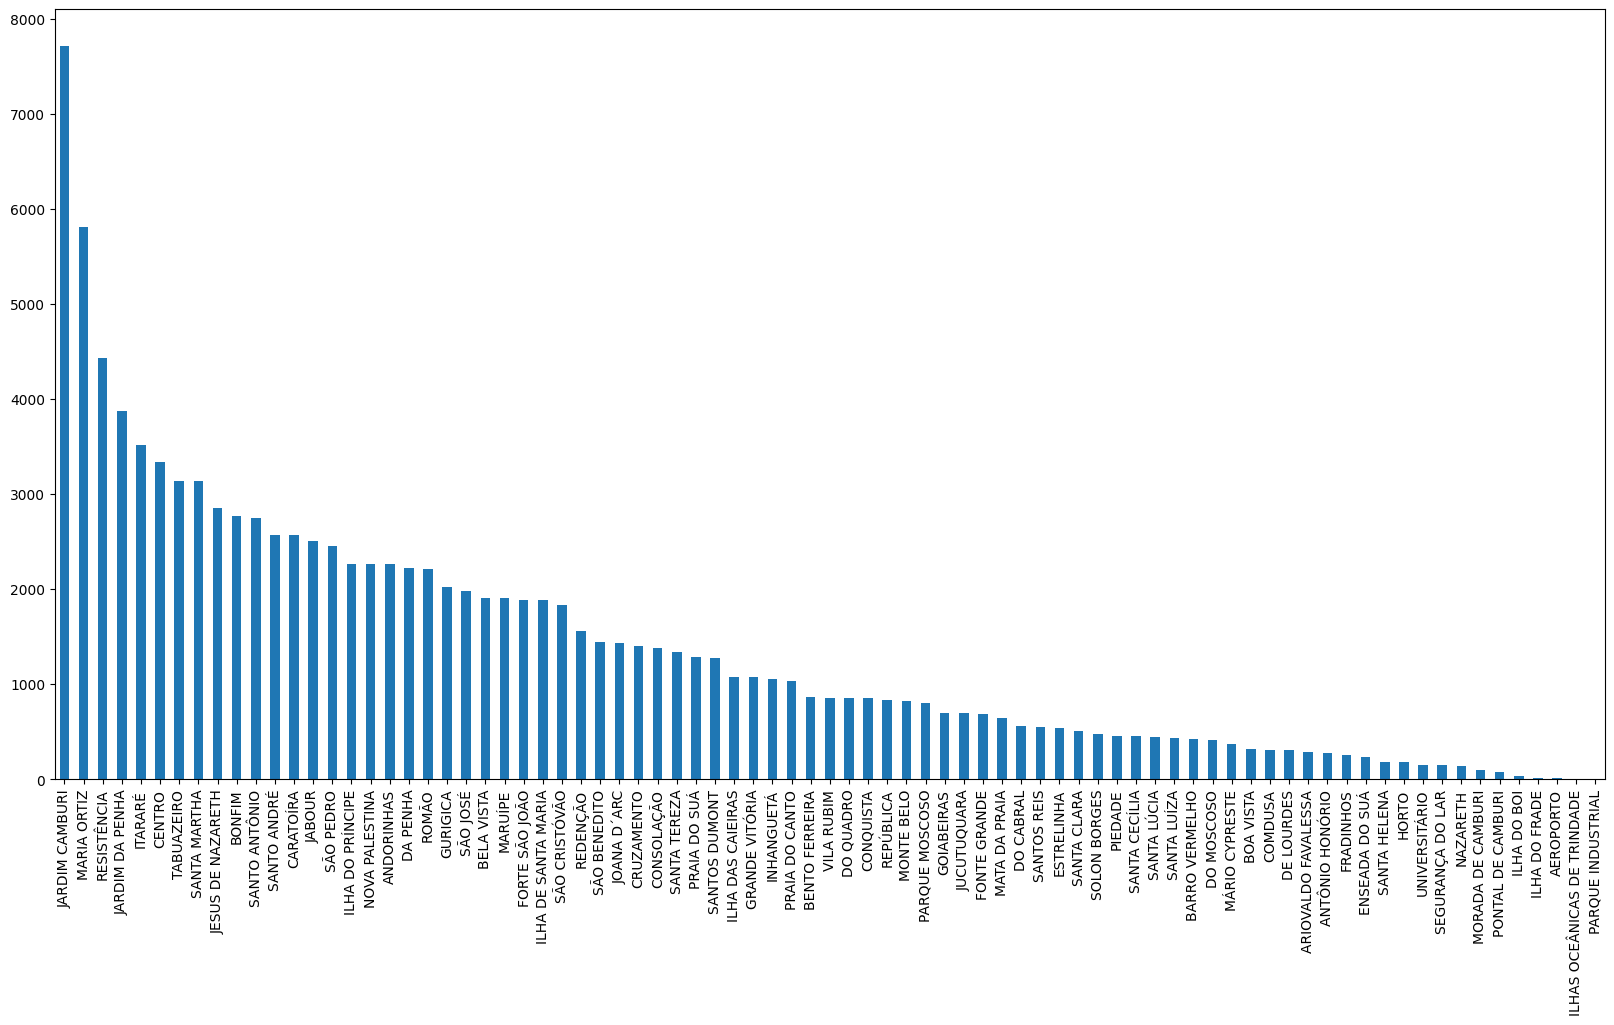

In [13]:
### Checking the neighborhood column to see if there isn't any curse of dimensality

df['neighbourhood'].value_counts().plot(kind='bar',figsize=(20,10));

## Insight from the chart: 
+ There are about 81 unique neighborhoods in the dataset
+ This number is smaller compared to the size of the entire dataset
+ Hence we can safely do one hot encoding without the fear of dimensionality curse

In [14]:
#### Using hotencoder to encode the neighbourhood column

# There are two ways of doing this, using the onehotencoder package from sklearn or get_dummies from pandas

df_encoded = pd.get_dummies(df['neighbourhood'])
df_encoded

,AEROPORTO,ANDORINHAS,ANTÔNIO HONÓRIO,ARIOVALDO FAVALESSA,BARRO VERMELHO,BELA VISTA,BENTO FERREIRA,BOA VISTA,BONFIM,CARATOÍRA,...,SANTOS REIS,SEGURANÇA DO LAR,SOLON BORGES,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,UNIVERSITÁRIO,VILA RUBIM
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110523,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110524,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Contenating the encoded columns back to the entire dataframe

In [15]:
df_final=pd.concat([df, df_encoded],axis=1)

df_final

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,...,SANTOS REIS,SEGURANÇA DO LAR,SOLON BORGES,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,UNIVERSITÁRIO,VILA RUBIM
0,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110523,0,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110524,0,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110525,0,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# make all columns lower case again
df_final.columns =df_final.columns.str.lower()
df_final.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,...,santos reis,segurança do lar,solon borges,são benedito,são cristóvão,são josé,são pedro,tabuazeiro,universitário,vila rubim
0,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# EDA 
+ Descriptive analysis
     - Value counts
     - Graphs for distribution 
     - Check for outliers

In [17]:
### Descriptive statistics for the dataset

df_final.describe()

,gender,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no-show,aeroporto,...,santos reis,segurança do lar,solon borges,são benedito,são cristóvão,são josé,são pedro,tabuazeiro,universitário,vila rubim
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,...,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,0.350023,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933,0.000072,...,0.004949,0.001312,0.004243,0.013019,0.016611,0.017887,0.022148,0.028337,0.001375,0.007699
std,0.476979,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444,0.008507,...,0.070175,0.036197,0.065003,0.113358,0.127811,0.132541,0.147167,0.165934,0.037059,0.087409
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
## Number of NaNs per column
(df_final.isna().sum()).sort_values(ascending =False).head(20)

gender               0
morada de camburi    0
praia do suá         0
praia do canto       0
pontal de camburi    0
piedade              0
parque moscoso       0
parque industrial    0
nova palestina       0
nazareth             0
mário cypreste       0
monte belo           0
inhanguetá           0
mata da praia        0
maruípe              0
maria ortiz          0
jucutuquara          0
joana d´arc          0
jesus de nazareth    0
jardim da penha      0
dtype: int64

### Findings: None of the columns/attribute has a null value

In [19]:
## Distribution of gender
df_final['gender'].value_counts()

0    71840
1    38687
Name: gender, dtype: int64

In [22]:
labels = ['Female', 'Male']


['Female', 'Male']

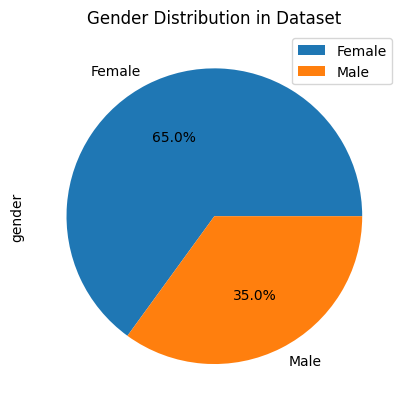

In [25]:
df_final['gender'].value_counts().plot(kind='pie', labels= labels,autopct='%1.1f%%')
plt.legend(loc='best', labels=labels)
plt.title('Gender Distribution in Dataset');

### Insights:
+ There more females than males in the dataset

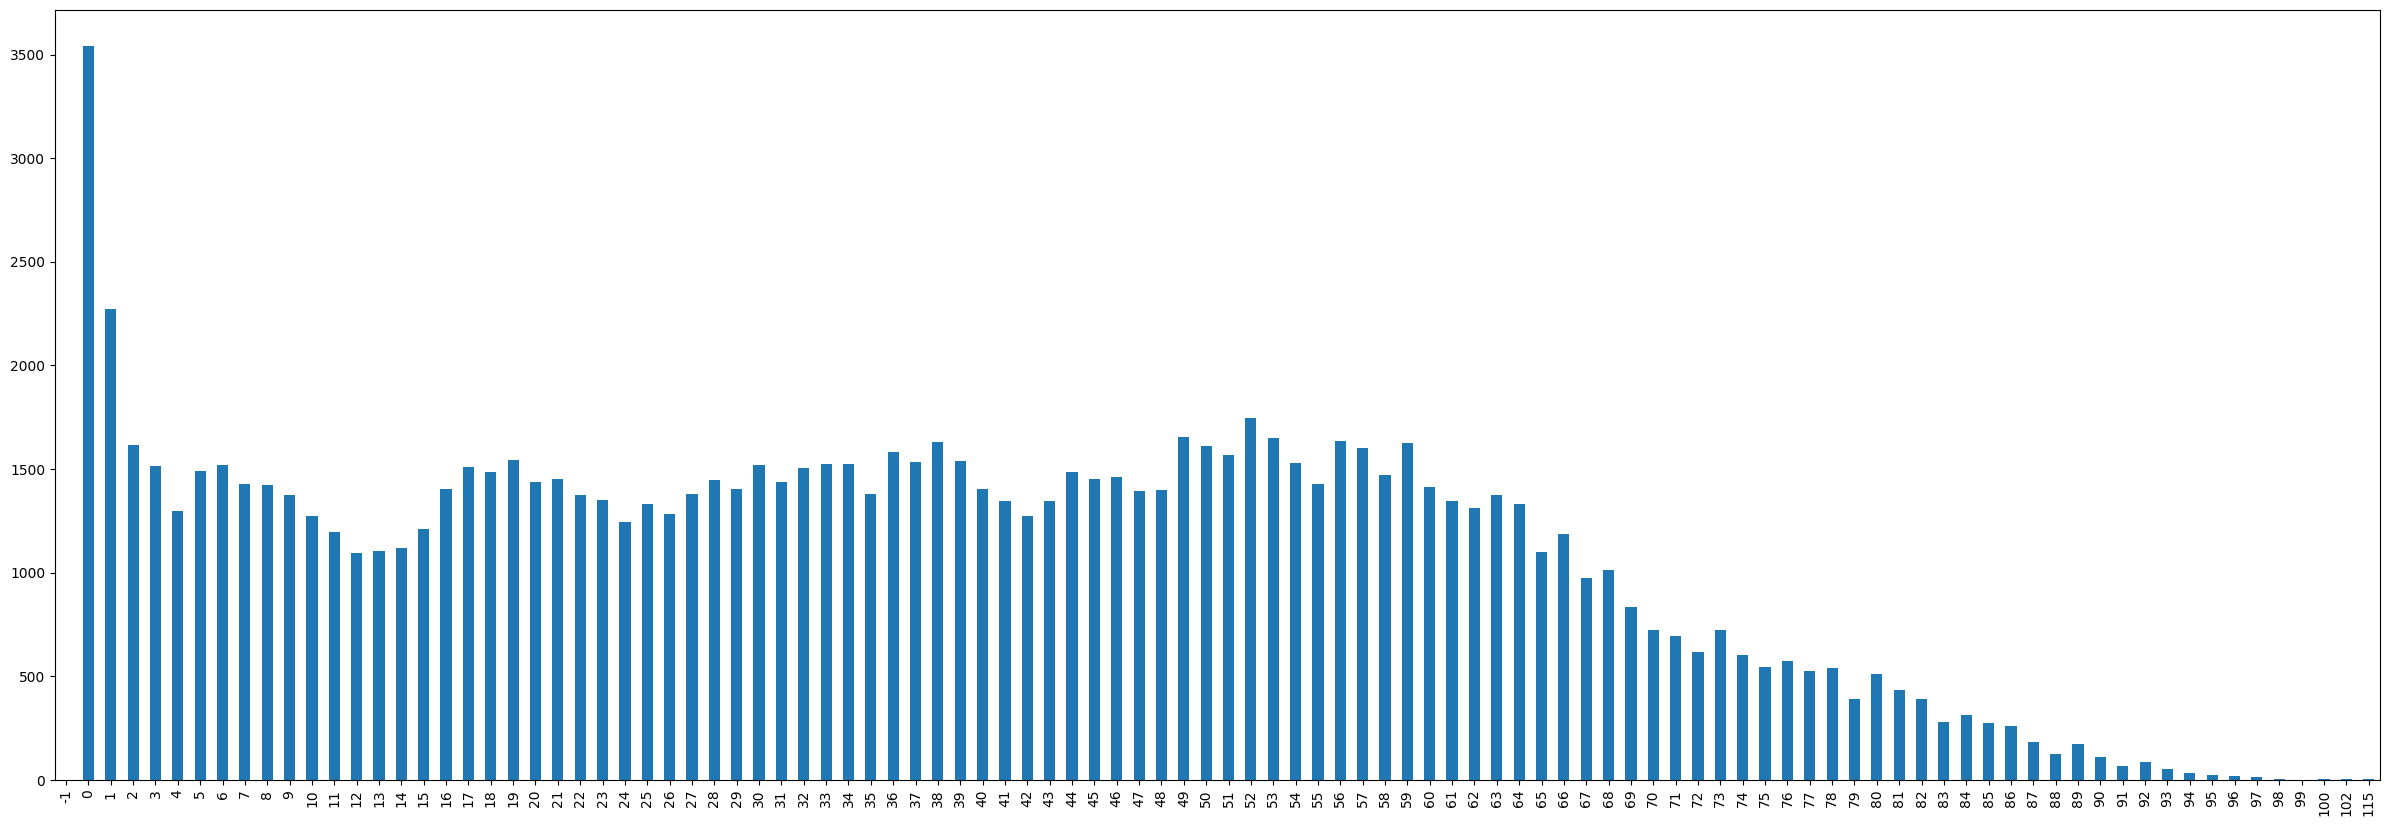

In [27]:
#### Descriptive statistics
df_final['age'].value_counts().sort_index().plot(kind='bar',figsize=(30,10));

### Insight
+ The commonest age in the dataset is children under age 1yr
+ Infants are the next common population in the dataset

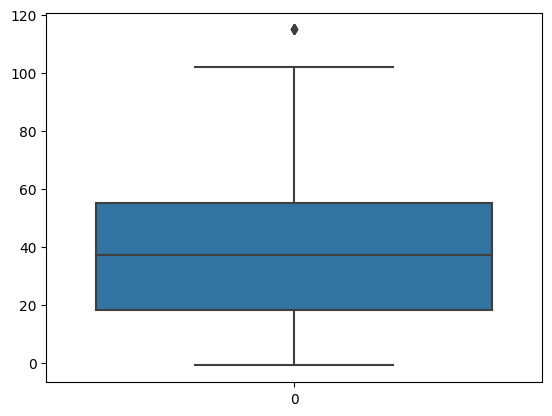

In [29]:
##Age range

sns.boxplot(df_final['age']);

In [30]:
## getting the maximum age
df_final.age.max()


115

In [31]:
## getting the minimum age
df_final.age.min()

-1

In [32]:
## Drop the outlier value,since age cannot be negative

df_final= df_final[df_final['age']>0]
df_final

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,...,santos reis,segurança do lar,solon borges,são benedito,são cristóvão,são josé,são pedro,tabuazeiro,universitário,vila rubim
0,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110523,0,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110524,0,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110525,0,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
### doing a frequency distribution table
labels = ['less than 19', '30-40', '40-50', '50-60','above 60']
bins = [0, 18, 30, 40, 50, 60]
df_freq= df.groupby(pd.cut(df_final['age'],bins=bins, labels =labels)).size()
df_freq

age
less than 19    25327
30-40           16765
40-50           15052
50-60           14420
above 60        15661
dtype: int64

In [35]:
### reset into a dataframe
df_freq=df_freq.reset_index(name='frequency')
df_freq

,age,frequency
0,less than 19,25327
1,30-40,16765
2,40-50,15052
3,50-60,14420
4,above 60,15661


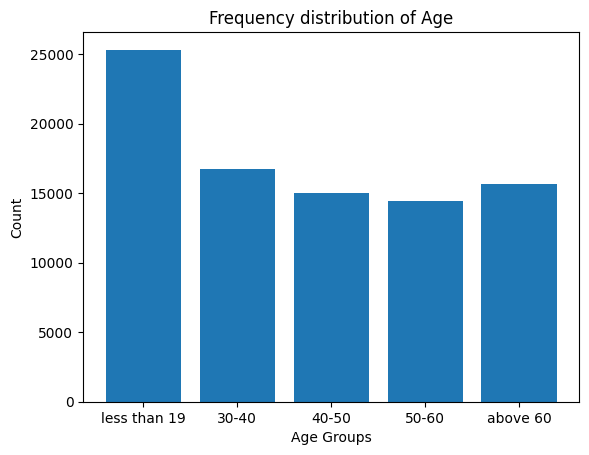

In [36]:
## Plot a barchart
plt.bar(df_freq['age'], df_freq['frequency'])
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.title('Frequency distribution of Age');


### Insight
+ Pediatric age group are the commonest, this age group are minors and are luckily to depend on an adult to attend hospital
+ Patients within the age category of 60 years and above, a retirement age, also contribute significantly to the dataset

In [144]:
df_final.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'no-show', 'aeroporto', 'andorinhas', 'antônio honório',
       'ariovaldo favalessa', 'barro vermelho', 'bela vista', 'bento ferreira',
       'boa vista', 'bonfim', 'caratoíra', 'centro', 'comdusa', 'conquista',
       'consolação', 'cruzamento', 'da penha', 'de lourdes', 'do cabral',
       'do moscoso', 'do quadro', 'enseada do suá', 'estrelinha',
       'fonte grande', 'forte são joão', 'fradinhos', 'goiabeiras',
       'grande vitória', 'gurigica', 'horto', 'ilha das caieiras',
       'ilha de santa maria', 'ilha do boi', 'ilha do frade',
       'ilha do príncipe', 'ilhas oceânicas de trindade', 'inhanguetá',
       'itararé', 'jabour', 'jardim camburi', 'jardim da penha',
       'jesus de nazareth', 'joana d´arc', 'jucutuquara', 'maria ortiz',
       'maruípe', 'mata da praia', 'monte belo', 'morada de cambur

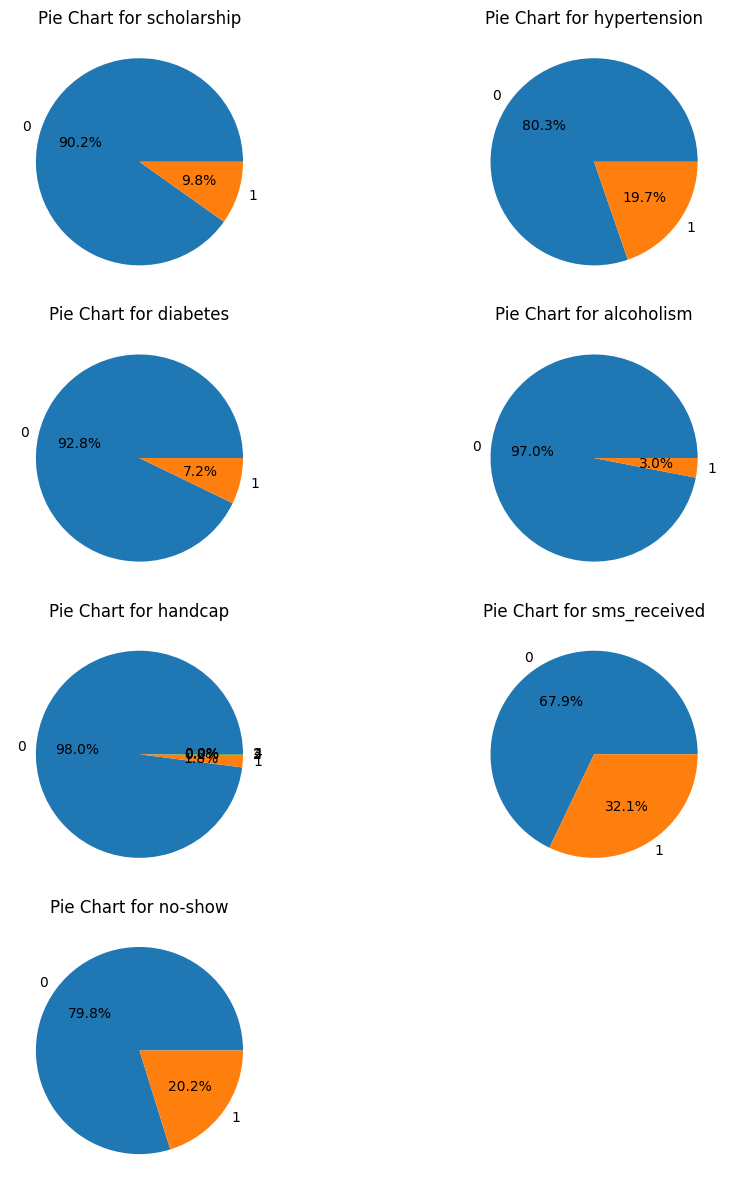

In [56]:
### loop to do the value counts and plot the graphs

cols= ['scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'no-show']

num_cols = len(cols)
fig, axes = plt.subplots(4, 2, figsize=(10, 12))

for i in range(num_cols):
   
    col_name = cols[i]
    ax=axes[i//2, i%2]
    df.groupby(col_name).size().sort_values(ascending=False).plot(kind='pie', ax= ax, autopct='%1.1f%%')
    df_final[col_name].value_counts().plot(kind='pie', autopct='%1.1f%%')
    axes[i//2, i%2].set_title(f'Pie Chart for {col_name}')
    
axes[3, 1].set_visible(False) # this will make the last empty figure invisible
        

plt.tight_layout()
plt.show()


### Feature Engineering using Sklearn
+ Selecting which features in the dataset influences the target the most
+ Get the scores of these features/columns
+ Create a new feature (interval between scheduling and appointment time)
+ From the dataset, there is a class in balance, where about 80% of patients did not show up versus 20% that did

In [74]:
## calculating the number of days that elapsed 
df_final['booking_interval'] = df_final['appointmentday'] - df_final['scheduledday']

df_final['booking_interval']=df_final['booking_interval'].dt.days

###  Removing negative appointment interval days

In [76]:
## converting the interval column into int
df_final = df_final[df_final['booking_interval']>=0]

df_final

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,...,segurança do lar,solon borges,são benedito,são cristóvão,são josé,são pedro,tabuazeiro,universitário,vila rubim,booking_interval
5,0,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10,0,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,34
110523,0,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,34
110524,0,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40
110525,0,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40


### Booking interval column

In [84]:
df_final['booking_interval'].describe()

count    69828.000000
mean        14.577089
std         16.512813
min          0.000000
25%          3.000000
50%          8.000000
75%         21.000000
max        178.000000
Name: booking_interval, dtype: float64

### Insight 
+ The average booking interval is about 15 days
+ About 75% of all booking are within 3 weeks of their appointment day
+ The minimum booking interval was 0, meaning the patient had the appointment same day they made the booking 
+ The maximum booking interval from the dataset was about 6 months.

### Feature importance

In [86]:
## importing the necessary libraries
### The functions that are commonly used are ANOVA for regression problems and Chi-square function for classification problems
### Recursive feature elimination

from sklearn.feature_selection import SelectKBest
from sklearn .feature_selection import chi2

In [87]:
#### Creating a selector object
# For classification tasks, use f_classif as the scoring function
# For regression tasks, use f_regression as the scoring function
selector = SelectKBest(score_func=chi2, k= 10)


In [99]:
df_final.dtypes

gender                            int64
scheduledday        datetime64[ns, UTC]
appointmentday      datetime64[ns, UTC]
age                               int64
neighbourhood                    object
                           ...         
são pedro                         uint8
tabuazeiro                        uint8
universitário                     uint8
vila rubim                        uint8
booking_interval                  int64
Length: 94, dtype: object

In [89]:
df_final.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'no-show', 'aeroporto', 'andorinhas', 'antônio honório',
       'ariovaldo favalessa', 'barro vermelho', 'bela vista', 'bento ferreira',
       'boa vista', 'bonfim', 'caratoíra', 'centro', 'comdusa', 'conquista',
       'consolação', 'cruzamento', 'da penha', 'de lourdes', 'do cabral',
       'do moscoso', 'do quadro', 'enseada do suá', 'estrelinha',
       'fonte grande', 'forte são joão', 'fradinhos', 'goiabeiras',
       'grande vitória', 'gurigica', 'horto', 'ilha das caieiras',
       'ilha de santa maria', 'ilha do boi', 'ilha do frade',
       'ilha do príncipe', 'ilhas oceânicas de trindade', 'inhanguetá',
       'itararé', 'jabour', 'jardim camburi', 'jardim da penha',
       'jesus de nazareth', 'joana d´arc', 'jucutuquara', 'maria ortiz',
       'maruípe', 'mata da praia', 'monte belo', 'morada de cambur

In [107]:
X_features = df_final[['gender', 'age',
       'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'aeroporto', 'andorinhas', 'antônio honório',
       'ariovaldo favalessa', 'barro vermelho', 'bela vista', 'bento ferreira',
       'boa vista', 'bonfim', 'caratoíra', 'centro', 'comdusa', 'conquista',
       'consolação', 'cruzamento', 'da penha', 'de lourdes', 'do cabral',
       'do moscoso', 'do quadro', 'enseada do suá', 'estrelinha',
       'fonte grande', 'forte são joão', 'fradinhos', 'goiabeiras',
       'grande vitória', 'gurigica', 'horto', 'ilha das caieiras',
       'ilha de santa maria', 'ilha do boi', 'ilha do frade',
       'ilha do príncipe', 'ilhas oceânicas de trindade', 'inhanguetá',
       'itararé', 'jabour', 'jardim camburi', 'jardim da penha',
       'jesus de nazareth', 'joana d´arc', 'jucutuquara', 'maria ortiz',
       'maruípe', 'mata da praia', 'monte belo', 'morada de camburi',
       'mário cypreste', 'nazareth', 'nova palestina', 'parque industrial',
       'parque moscoso', 'piedade', 'pontal de camburi', 'praia do canto',
       'praia do suá', 'redenção', 'república', 'resistência', 'romão',
       'santa cecília', 'santa clara', 'santa helena', 'santa luíza',
       'santa lúcia', 'santa martha', 'santa tereza', 'santo andré',
       'santo antônio', 'santos dumont', 'santos reis', 'segurança do lar',
       'solon borges', 'são benedito', 'são cristóvão', 'são josé',
       'são pedro', 'tabuazeiro', 'universitário', 'vila rubim',
       'booking_interval']]

In [108]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69828 entries, 5 to 110526
Data columns (total 90 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       69828 non-null  int64
 1   age                          69828 non-null  int64
 2   scholarship                  69828 non-null  int64
 3   hypertension                 69828 non-null  int64
 4   diabetes                     69828 non-null  int64
 5   alcoholism                   69828 non-null  int64
 6   handcap                      69828 non-null  int64
 7   sms_received                 69828 non-null  int64
 8   aeroporto                    69828 non-null  uint8
 9   andorinhas                   69828 non-null  uint8
 10  antônio honório              69828 non-null  uint8
 11  ariovaldo favalessa          69828 non-null  uint8
 12  barro vermelho               69828 non-null  uint8
 13  bela vista                   69828 non-null  

### Some further preprocessing using MinMax scaling

In [376]:
##calling an instance of standardScaler
scaler = MinMaxScaler()

X_features_scale = scaler.fit_transform(X_features)

In [377]:
X_features_scale

array([[0.        , 0.65789474, 0.        , ..., 0.        , 0.        ,
        0.00561798],
       [0.        , 0.19298246, 0.        , ..., 0.        , 0.        ,
        0.00561798],
       [0.        , 0.33333333, 0.        , ..., 0.        , 0.        ,
        0.00561798],
       ...,
       [0.        , 0.1754386 , 0.        , ..., 0.        , 0.        ,
        0.2247191 ],
       [0.        , 0.3245614 , 0.        , ..., 0.        , 0.        ,
        0.2247191 ],
       [0.        , 0.46491228, 0.        , ..., 0.        , 0.        ,
        0.2247191 ]])

In [378]:
### converting the results back into a dataframe

X_features_scaled_df = pd.DataFrame(X_features_scale, columns=X_features.columns)
X_features_scaled_df

,gender,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,aeroporto,andorinhas,...,segurança do lar,solon borges,são benedito,são cristóvão,são josé,são pedro,tabuazeiro,universitário,vila rubim,booking_interval
0,0.0,0.657895,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005618
1,0.0,0.192982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005618
2,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005618
3,0.0,0.157895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005618
4,0.0,0.254386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69823,0.0,0.482456,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.191011
69824,0.0,0.438596,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.191011
69825,0.0,0.175439,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.224719
69826,0.0,0.324561,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.224719


In [379]:
## Labels/target
ylabel= df_final['no-show']

In [380]:
# X_train is your feature matrix (2D array or DataFrame)
# y_train is your target array or column (1D array or Series)
best_features = selector.fit(X_features_scaled_df, ylabel)


In [381]:
### Getting the score of age
best_features_scores = best_features.scores_

best_features_scores


array([4.50867553e-01, 9.20745528e+01, 1.36002041e+02, 1.86018503e+02,
       3.39574800e+01, 2.73765356e+01, 1.12484694e+00, 1.31933318e+01,
       1.79078345e-01, 9.79326891e+00, 2.89452474e+00, 2.03505367e+00,
       5.54325943e-02, 1.61758203e-02, 1.97750809e-01, 1.09050604e+00,
       1.64545679e+00, 1.23723475e+01, 4.23738698e-02, 3.57248782e+00,
       1.96504193e-01, 5.26508599e-01, 4.03143480e-01, 6.64758231e-02,
       8.11083861e+00, 7.51227037e+00, 6.73255133e-03, 1.13753649e+01,
       3.28632414e-02, 6.83884154e-01, 1.35556459e+00, 1.62459915e+01,
       2.07981663e+00, 8.19049433e+00, 6.54452961e-01, 4.91514966e+01,
       2.33292769e+00, 7.57980523e-02, 2.70597523e+00, 4.44361934e+00,
       4.93513712e-02, 1.13688980e+01, 5.00591953e+00, 7.37225069e+00,
       7.25805751e+01, 6.18881844e+00, 1.74692927e+01, 4.77732682e+01,
       7.41517321e+01, 3.03075459e-01, 1.13833459e+00, 1.19219941e+01,
       1.21453303e+00, 9.95963433e+00, 2.34113862e+00, 2.89218295e+00,
      

In [382]:
## Creating a dataframe of the columns scores

df_scores=  pd.DataFrame(best_features_scores, columns=['Feature_Scores'])
df_scores

,Feature_Scores
0,0.450868
1,92.074553
2,136.002041
3,186.018503
4,33.957480
...,...
85,0.001294
86,1.833044
87,0.020875
88,8.844233


In [383]:
###Creating a dataframe of the columns in the X_features
df_features = pd.DataFrame(X_features.columns, columns=['Feature_Name'])
df_features

,Feature_Name
0,gender
1,age
2,scholarship
3,hypertension
4,diabetes
...,...
85,são pedro
86,tabuazeiro
87,universitário
88,vila rubim


In [384]:
## combining the two dataframes to so we can identify each feature and its corresponding score of importance

df_fimp = pd.concat([df_features, df_scores], axis=1)

df_fimp.sort_values(by='Feature_Scores', ascending=False)

,Feature_Name,Feature_Scores
3,hypertension,186.018503
2,scholarship,136.002041
1,age,92.074553
48,jesus de nazareth,74.151732
44,itararé,72.580575
...,...,...
62,pontal de camburi,0.010449
26,do moscoso,0.006733
74,santa martha,0.002467
85,são pedro,0.001294


In [385]:
df_top10= df_fimp.sort_values(by='Feature_Scores',ascending=False).head(10)
df_top10

,Feature_Name,Feature_Scores
3,hypertension,186.018503
2,scholarship,136.002041
1,age,92.074553
48,jesus de nazareth,74.151732
44,itararé,72.580575
35,gurigica,49.151497
47,jardim da penha,47.773268
4,diabetes,33.957480
5,alcoholism,27.376536
89,booking_interval,27.376436


### Insight
+ Age the of a patient is one of the most important features that influence whether they will honor their hospital appointment
+ The booking interval is the other important feature

### Lets check for correlation between the various features

In [387]:
X_features_scaled_df.corr()

,gender,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,aeroporto,andorinhas,...,segurança do lar,solon borges,são benedito,são cristóvão,são josé,são pedro,tabuazeiro,universitário,vila rubim,booking_interval
gender,1.000000,-0.085866,-0.110450,-0.035648,-0.014609,0.097731,0.022955,-0.028317,-0.002283,0.004974,...,0.001091,-0.014531,-0.010644,0.003813,0.002238,0.007760,0.005891,-0.010916,-0.000451,-0.007327
age,-0.085866,1.000000,-0.122992,0.498262,0.282686,0.075438,0.073743,-0.053022,0.006132,-0.008969,...,-0.005426,0.012022,-0.030133,0.006647,-0.012097,-0.004542,-0.015030,0.004973,0.017133,-0.002118
scholarship,-0.110450,-0.122992,1.000000,-0.032331,-0.027939,0.029282,-0.011583,0.019846,-0.002744,0.025192,...,-0.004536,0.002135,0.067645,0.000568,-0.008978,0.015882,0.038006,-0.006813,-0.001326,-0.025367
hypertension,-0.035648,0.498262,-0.032331,1.000000,0.423387,0.083665,0.081957,-0.040084,0.003803,0.024833,...,-0.016149,-0.026159,0.010424,0.032909,0.030837,0.031768,0.012430,0.006214,0.007849,-0.049987
diabetes,-0.014609,0.282686,-0.027939,0.423387,1.000000,0.022813,0.060476,-0.033002,-0.002444,0.040742,...,-0.009518,-0.019782,0.011166,0.015072,0.032063,0.020265,0.000796,0.007352,0.005967,-0.047847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
são pedro,0.007760,-0.004542,0.015882,0.031768,0.020265,0.032864,0.024896,-0.015775,-0.001262,-0.021997,...,-0.005647,-0.010213,-0.015746,-0.020092,-0.020555,1.000000,-0.024703,-0.005950,-0.013683,-0.065157
tabuazeiro,0.005891,-0.015030,0.038006,0.012430,0.000796,-0.007056,-0.002549,0.002538,-0.001402,-0.024435,...,-0.006273,-0.011345,-0.017492,-0.022319,-0.022834,-0.024703,1.000000,-0.006610,-0.015200,-0.006058
universitário,-0.010916,0.004973,-0.006813,0.006214,0.007352,-0.004276,-0.005266,-0.000702,-0.000338,-0.005886,...,-0.001511,-0.002733,-0.004213,-0.005376,-0.005500,-0.005950,-0.006610,1.000000,-0.003661,-0.011496
vila rubim,-0.000451,0.017133,-0.001326,0.007849,0.005967,-0.003171,0.008021,0.006688,-0.000776,-0.013535,...,-0.003475,-0.006284,-0.009689,-0.012363,-0.012648,-0.013683,-0.015200,-0.003661,1.000000,0.008679


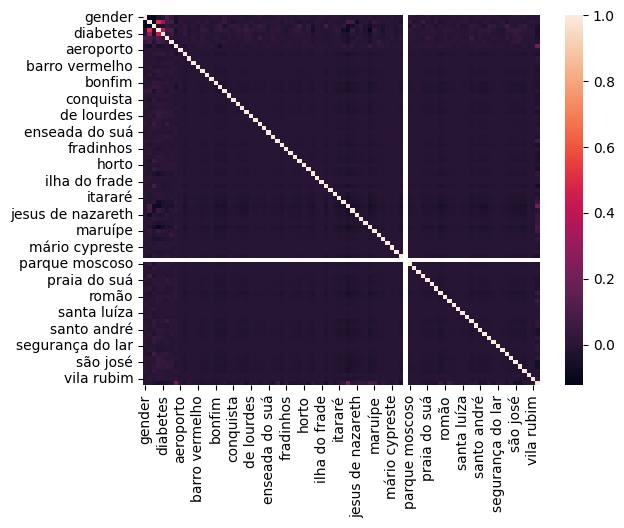

In [388]:
## Plotting a heatmap 
sns.heatmap(X_features_scaled_df.corr());

### Correlation of the top 10 features

In [391]:
corr_coef= X_features_scaled_df[['hypertension',
 'scholarship',
 'age',
 'jesus de nazareth',
 'itararé',
 'gurigica',
 'jardim da penha',
 'diabetes',
 'alcoholism',
 'booking_interval']].corr()

corr_coef

,hypertension,scholarship,age,jesus de nazareth,itararé,gurigica,jardim da penha,diabetes,alcoholism,booking_interval
hypertension,1.000000,-0.032331,0.498262,-0.020516,0.010051,0.015199,0.037438,0.423387,0.083665,-0.049987
scholarship,-0.032331,1.000000,-0.122992,-0.008317,-0.007161,0.052590,-0.061451,-0.027939,0.029282,-0.025367
age,0.498262,-0.122992,1.000000,-0.070369,-0.014344,-0.030348,0.073990,0.282686,0.075438,-0.002118
jesus de nazareth,-0.020516,-0.008317,-0.070369,1.000000,-0.029101,-0.019295,-0.031146,-0.013519,0.014109,0.031553
itararé,0.010051,-0.007161,-0.014344,-0.029101,1.000000,-0.022736,-0.036699,0.002021,-0.004719,0.007843
gurigica,0.015199,0.052590,-0.030348,-0.019295,-0.022736,1.000000,-0.024333,0.011612,0.007384,-0.031925
jardim da penha,0.037438,-0.061451,0.073990,-0.031146,-0.036699,-0.024333,1.000000,0.012335,-0.022546,-0.002178
diabetes,0.423387,-0.027939,0.282686,-0.013519,0.002021,0.011612,0.012335,1.000000,0.022813,-0.047847
alcoholism,0.083665,0.029282,0.075438,0.014109,-0.004719,0.007384,-0.022546,0.022813,1.000000,-0.028913
booking_interval,-0.049987,-0.025367,-0.002118,0.031553,0.007843,-0.031925,-0.002178,-0.047847,-0.028913,1.000000


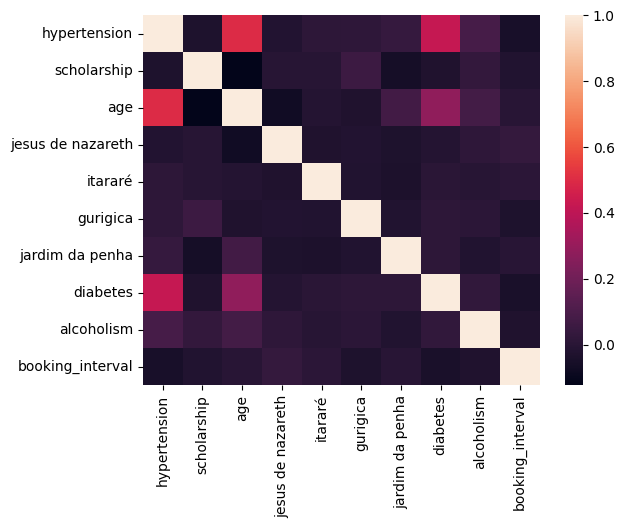

In [395]:
### heatmap of the top 10 features
sns.heatmap(corr_coef);

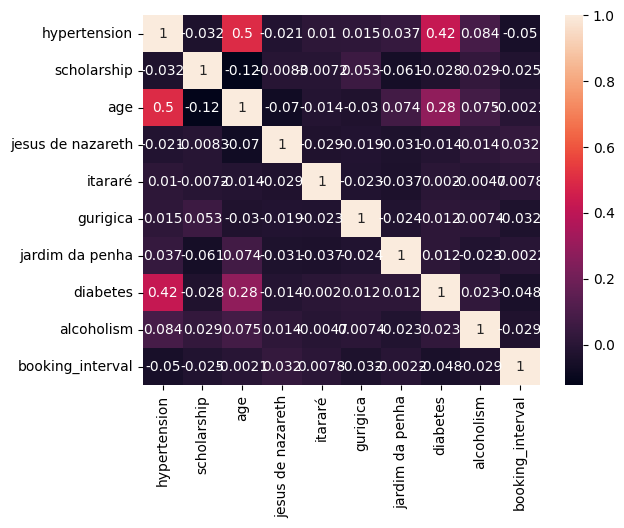

In [396]:
### heatmap of the top 10 features
sns.heatmap(corr_coef, annot=True);

In [151]:
## plotting a heatmap with annotations
# plt.figure(figsize=(20,10))
# sns.heatmap(X_features.corr(), annot=True)
# plt.show();

### Model Building 
+ Features and labels
+ Train/Test Split
+ Classification algorithms
    -Logistic Regression
    -KNN
    -SVC
    -Naive Bayes
    -Decision Tree
    -Random Forest
+ Serialization
    

In [198]:
##Importing the packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### We will use the top 10 most important features

In [389]:
X= df_top10['Feature_Name'].tolist()
X

['hypertension',
 'scholarship',
 'age',
 'jesus de nazareth',
 'itararé',
 'gurigica',
 'jardim da penha',
 'diabetes',
 'alcoholism',
 'booking_interval']

In [397]:
xfeatures =X_features_scaled_df[X]
xfeatures

,hypertension,scholarship,age,jesus de nazareth,itararé,gurigica,jardim da penha,diabetes,alcoholism,booking_interval
0,1.0,0.0,0.657895,0.0,0.0,0.0,0.0,0.0,0.0,0.005618
1,0.0,0.0,0.192982,0.0,0.0,0.0,0.0,0.0,0.0,0.005618
2,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.005618
3,0.0,0.0,0.157895,0.0,0.0,0.0,0.0,0.0,0.0,0.005618
4,0.0,0.0,0.254386,0.0,0.0,0.0,0.0,0.0,0.0,0.005618
...,...,...,...,...,...,...,...,...,...,...
69823,0.0,0.0,0.482456,0.0,0.0,0.0,0.0,0.0,0.0,0.191011
69824,0.0,0.0,0.438596,0.0,0.0,0.0,0.0,0.0,0.0,0.191011
69825,0.0,0.0,0.175439,0.0,0.0,0.0,0.0,0.0,0.0,0.224719
69826,0.0,0.0,0.324561,0.0,0.0,0.0,0.0,0.0,0.0,0.224719


In [497]:
xfeatures = xfeatures.reset_index(drop= True)
xfeatures

,hypertension,scholarship,age,jesus de nazareth,itararé,gurigica,jardim da penha,diabetes,alcoholism,booking_interval
0,1.0,0.0,0.657895,0.0,0.0,0.0,0.0,0.0,0.0,0.005618
1,0.0,0.0,0.192982,0.0,0.0,0.0,0.0,0.0,0.0,0.005618
2,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.005618
3,0.0,0.0,0.157895,0.0,0.0,0.0,0.0,0.0,0.0,0.005618
4,0.0,0.0,0.254386,0.0,0.0,0.0,0.0,0.0,0.0,0.005618
...,...,...,...,...,...,...,...,...,...,...
69823,0.0,0.0,0.482456,0.0,0.0,0.0,0.0,0.0,0.0,0.191011
69824,0.0,0.0,0.438596,0.0,0.0,0.0,0.0,0.0,0.0,0.191011
69825,0.0,0.0,0.175439,0.0,0.0,0.0,0.0,0.0,0.0,0.224719
69826,0.0,0.0,0.324561,0.0,0.0,0.0,0.0,0.0,0.0,0.224719


In [495]:
##target
ylabel = df_final['no-show']

In [496]:
ylabel = ylabel.reset_index(drop=True)
ylabel

0        0
1        1
2        1
3        0
4        0
        ..
69823    0
69824    0
69825    0
69826    0
69827    0
Name: no-show, Length: 69828, dtype: int64

### Exporting this extracted features for neural network model on collab

In [499]:
# ### Data interest/ exporting for neural network

df_nn = pd.concat([xfeatures, ylabel], axis=1)
df_nn

##export as csv

df_nn.to_csv('appointment_neuralnetwork.csv', index=False)

### Splitting the data into train/test

In [403]:
### Train/Test split

X_train1, X_test, y_train1, y_test = train_test_split(xfeatures, ylabel, test_size =0.2, random_state=42)

### Using random oversampling to resolve the issue of class imbalance

In [404]:
### Import pkg
from imblearn.over_sampling import RandomOverSampler

In [406]:
### Creating an instance of random over sampler

ros = RandomOverSampler(random_state =42)

In [407]:
### Applying the over sampling 

X_train, y_train = ros.fit_resample(X_train1, y_train1)

### Logistic Regression

In [408]:
### Instantiating the model

model_logit = LogisticRegression()

In [409]:
## Fitting the model to the data
model_logit.fit(X_train, y_train)

LogisticRegression()

In [410]:
model_logit.score(X_test, y_test)

0.5622941429185164

In [411]:
### predictions
logit_pred = model_logit.predict(X_test)

## classification report

report= classification_report(logit_pred, y_test)

print(report)

              precision    recall  f1-score   support

           0       0.56      0.77      0.64      7219
           1       0.58      0.34      0.43      6747

    accuracy                           0.56     13966
   macro avg       0.57      0.56      0.54     13966
weighted avg       0.57      0.56      0.54     13966



### SVC

In [412]:
### Instantiating the model

model_svc = SVC()

In [413]:
## Fitting the model to the data
model_svc.fit(X_train, y_train)

SVC()

In [414]:
model_svc.score(X_test, y_test)

0.5471144207360733

In [415]:
### predictions
svc_pred = model_svc.predict(X_test)

## classification report

report= classification_report(svc_pred, y_test)

print(report)

              precision    recall  f1-score   support

           0       0.51      0.78      0.62      6569
           1       0.63      0.34      0.44      7397

    accuracy                           0.55     13966
   macro avg       0.57      0.56      0.53     13966
weighted avg       0.58      0.55      0.53     13966



### KNN

In [416]:
### Instantiating the model

model_knn = KNeighborsClassifier(n_neighbors = 129)

In [417]:
## Fitting the model to the data
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=129)

In [418]:
model_knn.score(X_test, y_test)

0.5814836030359445

In [419]:
### predictions
knn_pred = model_knn.predict(X_test)

## classification report

report= classification_report(knn_pred, y_test)

print(report)

              precision    recall  f1-score   support

           0       0.60      0.76      0.67      7835
           1       0.54      0.35      0.42      6131

    accuracy                           0.58     13966
   macro avg       0.57      0.56      0.55     13966
weighted avg       0.57      0.58      0.56     13966



### DecisionTree

In [420]:
### Instantiating the model

model_tree = DecisionTreeClassifier()

In [421]:
## Fitting the model to the data
model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [422]:
model_tree.score(X_test, y_test)

0.5864241729915509

In [423]:
### predictions
tree_pred = model_tree.predict(X_test)

## classification report

report= classification_report(tree_pred, y_test)

print(report)

              precision    recall  f1-score   support

           0       0.65      0.74      0.69      8696
           1       0.44      0.33      0.38      5270

    accuracy                           0.59     13966
   macro avg       0.54      0.54      0.53     13966
weighted avg       0.57      0.59      0.57     13966



### Random Forest

In [424]:
### Instantiating the model

model_forest = RandomForestClassifier(n_estimators =113, random_state =42)

In [425]:
## Fitting the model to the data
model_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=113, random_state=42)

In [426]:
model_forest.score(X_test, y_test)

0.5772590577115853

In [427]:
### predictions
forest_pred = model_forest.predict(X_test)

## classification report

report= classification_report(forest_pred, y_test)

print(report)

              precision    recall  f1-score   support

           0       0.63      0.74      0.68      8440
           1       0.45      0.33      0.38      5526

    accuracy                           0.58     13966
   macro avg       0.54      0.53      0.53     13966
weighted avg       0.56      0.58      0.56     13966



### Naive Bayes

In [428]:
### Instantiating the model

model_naive = GaussianNB()

In [429]:
## Fitting the model to the data
model_naive.fit(X_train, y_train)

GaussianNB()

In [430]:
model_naive.score(X_test, y_test)

0.6592438779894029

In [431]:
### predictions
naive_pred = model_naive.predict(X_test)

## classification report

report= classification_report(naive_pred, y_test)

print(report)

              precision    recall  f1-score   support

           0       0.83      0.73      0.78     11313
           1       0.24      0.35      0.28      2653

    accuracy                           0.66     13966
   macro avg       0.53      0.54      0.53     13966
weighted avg       0.72      0.66      0.68     13966



## Model Interpretation

### How to visualize the decision tree algorithm


In [432]:
## importing the necessary packages

from IPython.display import Image
from sklearn import tree
import pydotplus

In [433]:
pip install graphviz

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [434]:
best_features= xfeatures.columns

best_features

Index(['hypertension', 'scholarship', 'age', 'jesus de nazareth', 'itararé',
       'gurigica', 'jardim da penha', 'diabetes', 'alcoholism',
       'booking_interval'],
      dtype='object')

In [435]:
## target/label
target_names = ['No', 'Yes']

In [436]:
### Create a dotplot

dot_data= tree.export_graphviz(model_tree, out_file = None, feature_names = best_features, class_names= target_names)

In [437]:
## Draaw the graph
graph= pydotplus.graph_from_dot_data(dot_data)

In [438]:
### to view a png version of the decision tree
# Image(graph.create_png())

In [439]:
## Saving the graph
# graph.write_png('patient_appointment.png')

## Using ELI5 ( Explain like am 5) for model interpretation

In [440]:
## package for interpreting the model
import eli5

In [450]:
eli5.show_weights(model_logit, top=12)

Weight?,Feature
+1.455,x9
+0.433,x5
+0.387,x8
+0.337,x3
+0.326,x4
+0.285,x1
+0.179,<BIAS>
+0.141,x7
-0.105,x0
-0.133,x6


In [451]:
### detailed info
eli5.show_weights(model_logit, feature_names =best_features.tolist(), target_names =target_names,  top=102)

Weight?,Feature
+1.455,booking_interval
+0.433,gurigica
+0.387,alcoholism
+0.337,jesus de nazareth
+0.326,itararé
+0.285,scholarship
+0.179,<BIAS>
+0.141,diabetes
-0.105,hypertension
-0.133,jardim da penha


## Model Evaluation
+ Confusion Matrix
+ Classification Report
+ Accuracy score

In [443]:
## Importing the packages
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix

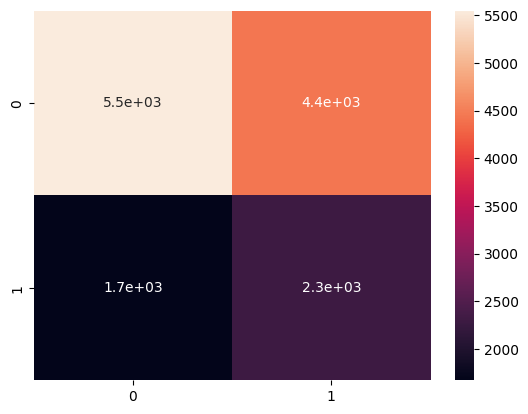

In [444]:
sns.heatmap(confusion_matrix(y_test, logit_pred), annot=True);

In [485]:
### evaluation metrics
tn,fp, fn, tp = confusion_matrix(y_test, logit_pred).ravel()

In [486]:
## Chances of corrrect prediction of if you show up
sensitivity = (tp / (tp+fn))*100

sensitivity

57.96882855706386

In [487]:
## Chances of corrrect prediction of if you did not show up
specificity = (tn / (tn+fp))*100

specificity

55.53664397276732

### Model Serialization

In [488]:
###Import packages
import joblib

In [489]:
### logistic regression model
## the model worth saving is the logistic regression model since that was the model with the highest accuracy

with open('appointment_model.pkl', 'wb') as model_file:
    joblib.dump(model_logit, model_file)
    model_file.close()